In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

Implementing K-means from scrach without scikit learn

In [2]:
# Finding the closest centrodid for data points

def find_closest_centroid(X, centroids):
    no_of_datapoints = X.shape[0]

    indexes = np.zeros(no_of_datapoints)

    for data_index,data_point in enumerate(X):
        min_distance = float('inf')
        closest_centroid_index = -1
        for centroid_index, centroid in enumerate(centroids):
            difference = data_point - centroid
            distance = np.linalg.norm(difference)
            if(distance < min_distance):
                min_distance = distance
                closest_centroid_index = centroid_index
        indexes[data_index] = closest_centroid_index

    return indexes            

In [3]:
# Testing find_closest_centroid function

X_test = np.array([[2, 2.5], [2.5, 2.5], [-1.5, -1.5],
                  [2, 2], [-1.5, -1], [-1, -1]])
initial_centroids = np.array([[2.5, 2], [-1, -1]])


print(find_closest_centroid(X_test, initial_centroids))


[0. 0. 1. 0. 1. 1.]


In [4]:
# Update centroid positions

def update_centroids(indexes, no_of_centroids, X):
    m,n = X.shape
    centroids = np.zeros((no_of_centroids, n))

    for i in range(no_of_centroids):
        points = X[indexes == i]
        centroids[i] = np.mean(points, axis=0)

    return centroids        

In [5]:
# Testing update_centroids function

idx = np.array([0, 0, 1, 0, 1, 1])
no_clusters = 2

print(update_centroids(idx, no_clusters, X_test))

[[ 2.16666667  2.33333333]
 [-1.33333333 -1.16666667]]


In [6]:
# Setting up initial centroids

def initialize_centroids(X, no_of_centroids):

    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:no_of_centroids]]
    return centroids

In [7]:
def run_Kmeans(X, initial_centroids, max_iters=10):
    
    m, n = X.shape
    no_clusters = initial_centroids.shape[0]
    centroids = initial_centroids   
    indexes = np.zeros(m)

    for i in range(max_iters):
    
        print("KMeans iteration %d/%d" % (i, max_iters-1))
        
        indexes = find_closest_centroid(X, centroids)
    
        centroids = update_centroids(indexes, no_clusters, X)
    return centroids, indexes

In [8]:
# Test run
no_of_centroids = 2
max_iters = 10

initial_centroids = initialize_centroids(X_test, no_of_centroids)

centroids, indexes = run_Kmeans(X_test,initial_centroids,max_iters)



KMeans iteration 0/9
KMeans iteration 1/9
KMeans iteration 2/9
KMeans iteration 3/9
KMeans iteration 4/9
KMeans iteration 5/9
KMeans iteration 6/9
KMeans iteration 7/9
KMeans iteration 8/9
KMeans iteration 9/9


In [9]:
# View assigned centroids for data points
print(indexes)

[1. 1. 0. 1. 0. 0.]


Random initialization of centroids can cause not to obtain the perfect clusters, can be avoided by using the concept introduced in 
Kmeans ++ (D**2 Weighting)

Using Kmeans algorithem to perform image compression by reducing colors (Using scikit learn for optimized version)

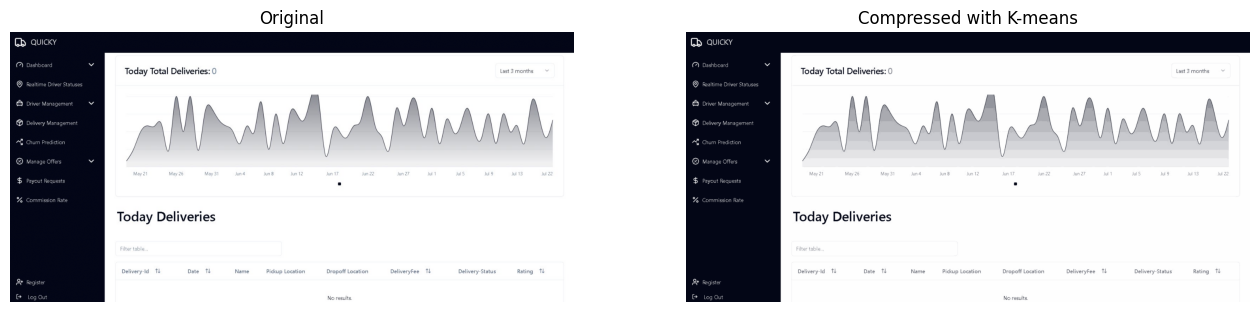

In [12]:
img_rgba = Image.open('../assets/test_images/chart.jpeg')

img_rgb = img_rgba.convert('RGB')

# Normalize the pixel values
image = np.array(img_rgb)
image = image / 255.0

# Reshape the image
reshaped_img = np.reshape(image, (image.shape[0] * image.shape[1], 3))

# Apply K-means clustering
kmeans = KMeans(n_clusters=12, n_init=10, random_state=42)
kmeans.fit(reshaped_img)

# Get centroid colors
new_palette = (kmeans.cluster_centers_ * 255).astype(np.uint8)

# Get centroid labels for each pixel
labels = kmeans.labels_

# Recreate the compressed image
X_recovered = new_palette[labels]
X_recovered = np.reshape(X_recovered, image.shape)


fig, ax = plt.subplots(1, 2, figsize=(16, 16))
plt.axis('off')

ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with K-means')
ax[1].set_axis_off()

plt.show()
